In [1]:
pip install twython

In [2]:
pip install -U scikit-fuzzy

     |████████████████████████████████| 1.0MB 2.7MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=4f7e1c44f5d34f6aa4896e675f7cd47b8b95ff059a0a9c65ba6485e045638bf6
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [3]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [6]:
import pandas as pd
import re
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
import io
from google.colab import files
upload = files.upload() 
traindata = pd.read_csv(io.StringIO(upload['nuclear.csv'].decode('ISO-8859-1')))
start = time.time()

Saving nuclear.csv to nuclear (1).csv


In [7]:
doc=traindata.tweet_text
print(len(doc))
sentidoc=traindata.sentiment
len(sentidoc)

190


190

In [ ]:
# doc=[]
# sentidoc=[]
# for j in range(len(traindata.tweet_text)):
#   if traindata.sentiment[j]=='irrelevant':
#     continue
#   else:
#     doc.append(traindata.tweet_text[j])
#     sentidoc.append(traindata.sentiment[j])
# print(len(doc))
# len(sentidoc)

3424


3424

In [8]:
tweets=[]
senti=[]



for j in range(len(doc)):
    str1=doc[j]
    str2=str1.lower()
    tweets.append(str2)   # converted into lower case
    senti.append(sentidoc[j])

len(senti)

190

In [9]:
def preprocessing(phrase):   # text pre-processing 
        # specific
        phrase = re.sub(r'\W', ' ', phrase)  # Remove all the special characters
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)
        phrase = re.sub(r"@", "" , phrase)         # removal of @
        phrase =  re.sub(r"http\S+", "", phrase)   # removal of URLs
        phrase = re.sub(r"#", "", phrase)          # hashtag processing

        phrase= re.sub(r'\s+[a-zA-Z]\s+', ' ', phrase)  # remove all single characters
   
        phrase = re.sub(r'\^[a-zA-Z]\s+', ' ', phrase)          # Remove single characters from the start
    # Substituting multiple spaces with single space
        phrase = re.sub(r'\s+', ' ', phrase, flags=re.I)

    # Removing prefixed 'b'
        phrase = re.sub(r'^b\s+', '', phrase)
    
        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        return phrase

In [10]:
for k in range(len(doc)):
    tweets[k]=preprocessing(tweets[k])

In [ ]:
# k=455
# print(doc[k])
# print(tweets[k])

@Apple #iOS5 NONSTOP DROPPED CALLS&MUTE BUTTON RANDOMLY ACTIVATING&PERSON CANT HEAR ME, PULL PHONE FROM EAR TO BE ON A "MOBILE ME" SCREEN
 apple  ios5 nonstop dropped calls mute button randomly activating person cant hear me  pull phone from ear to be on mobile me  screen


Descriptors


In [11]:
# # trimf
x_p = np.arange(0, 1, 0.05)
x_n = np.arange(0, 1, 0.05)
x_op = np.arange(0, 10, 0.5)

# Generate fuzzy membership functions
p_v_lo=fuzz.trimf(x_p, [0, 0, 0.25])
p_lo = fuzz.trimf(x_p, [0, 0.25, 0.5])
p_md = fuzz.trimf(x_p, [0.25, 0.5, 0.75])
p_hi = fuzz.trimf(x_p, [0.5, 0.75, 1])
p_v_hi = fuzz.trimf(x_p, [0.75, 1, 1])

n_v_lo =fuzz.trimf(x_n, [0, 0, 0.25])
n_lo = fuzz.trimf(x_n, [0, 0.25, 0.5])
n_md = fuzz.trimf(x_n, [0.25, 0.5, 0.75])
n_hi = fuzz.trimf(x_n, [0.5, 0.75, 1])
n_v_hi = fuzz.trimf(x_n, [0.75, 1, 1])

op_v_Neg =fuzz.trimf(x_op, [0, 0, 2.5])
op_Neg = fuzz.trimf(x_op, [0, 2.5, 5])
op_Neu = fuzz.trimf(x_op, [2.5, 5, 7.5])
op_Pos = fuzz.trimf(x_op, [5, 7.5, 10])
op_v_Pos = fuzz.trimf(x_op, [7.5, 10, 10])

# # op_Neg = fuzz.trimf(x_op, [0, 0, 5])  # Scale : Neg Neu Pos
# # op_Neu = fuzz.trimf(x_op, [0, 5, 10])
# # op_Pos = fuzz.trimf(x_op, [5, 10, 10])

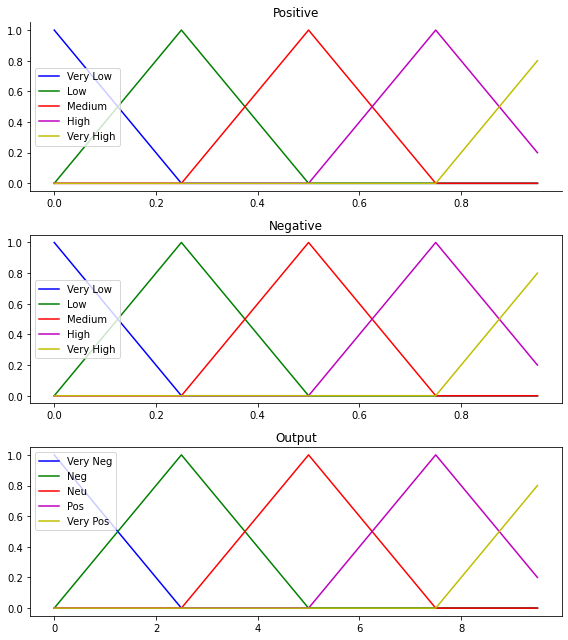

In [ ]:
import matplotlib.pyplot as plt

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_p, p_v_lo, 'b', linewidth=1.5, label='Very Low')
ax0.plot(x_p, p_lo, 'g', linewidth=1.5, label='Low')
ax0.plot(x_p, p_md, 'r', linewidth=1.5, label='Medium')
ax0.plot(x_p, p_hi, 'm', linewidth=1.5, label='High')
ax0.plot(x_p, p_v_hi, 'y', linewidth=1.5, label='Very High')
ax0.set_title('Positive')
ax0.legend()

ax1.plot(x_n, n_v_lo, 'b', linewidth=1.5, label='Very Low')
ax1.plot(x_n, n_lo, 'g', linewidth=1.5, label='Low')
ax1.plot(x_n, n_md, 'r', linewidth=1.5, label='Medium')
ax1.plot(x_n, n_hi, 'm', linewidth=1.5, label='High')
ax1.plot(x_n, n_v_hi, 'y', linewidth=1.5, label='Very High')
ax1.set_title('Negative')
ax1.legend()

ax2.plot(x_op, op_v_Neg, 'b', linewidth=1.5, label='Very Neg')
ax2.plot(x_op, op_Neg, 'g', linewidth=1.5, label='Neg')
ax2.plot(x_op, op_Neu, 'r', linewidth=1.5, label='Neu')
ax2.plot(x_op, op_Pos, 'm', linewidth=1.5, label='Pos')
ax2.plot(x_op, op_v_Pos, 'y', linewidth=1.5, label='Very Pos')
ax2.set_title('Output')
ax2.legend()

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [ ]:
# x_p = np.arange(0, 1, 0.05)
# x_n = np.arange(0, 1, 0.05)
# x_op = np.arange(0, 10, 0.5)

# # Generate fuzzy membership functions
# p_v_lo=fuzz.trapmf(x_p, [0, 0,0, 0.25])
# p_lo = fuzz.trapmf(x_p, [0, 0.15,0.35, 0.5])
# p_md = fuzz.trapmf(x_p, [0.25, 0.4,0.6, 0.75])
# p_hi = fuzz.trapmf(x_p, [0.5,0.65,0.85, 1])
# p_v_hi = fuzz.trapmf(x_p, [0.85, 1,1, 1])

# n_v_lo =fuzz.trapmf(x_n, [0, 0,0, 0.25])
# n_lo = fuzz.trapmf(x_n, [0, 0.15,0.35, 0.5])
# n_md = fuzz.trapmf(x_n, [0.25, 0.4,0.6, 0.75])
# n_hi = fuzz.trapmf(x_n, [0.5,0.65,0.85, 1])
# n_v_hi = fuzz.trapmf(x_n, [0.85, 1,1, 1])

# op_v_Neg =fuzz.trimf(x_op, [0, 0, 2.5])
# op_Neg = fuzz.trimf(x_op, [0, 2.5, 5])
# # op_Neu = fuzz.trimf(x_op, [2.5, 5, 7.5])
# op_Pos = fuzz.trimf(x_op, [5, 7.5, 10])
# op_v_Pos = fuzz.trimf(x_op, [7.5, 10, 10])

# # op_Neg = fuzz.trimf(x_op, [0, 0, 5])  # Scale : Neg Neu Pos
# # op_Neu = fuzz.trimf(x_op, [0, 5, 10])
# # op_Pos = fuzz.trimf(x_op, [5, 10, 10])

In [ ]:
# 1st approach  (worst results)
# SIA = SentimentIntensityAnalyzer()
# Out=[]
# sentiment=[]
# sentiment_doc=[]
# for j in range(len(doc)):
#     sentiment_doc.append(senti[j])
#     ss = SIA.polarity_scores(tweets[j])
#     posscore=ss['pos']
#     negscore=ss['neg']
#     neuscore=ss['neu']
#     compoundscore=ss['compound']
   
#     print(str(j+1)+" {:-<65} {}".format(tweets[j], str(ss))) 
    
#     print("\nPositive Score for each  tweet :")    
#     if (posscore==1):
#         posscore=0.9 
#     else:
#         posscore=round(posscore,1)
#     print(posscore)

#     print("\nNegative Score for each  tweet :")
#     if (negscore==1):
#         negscore=0.9
#     else:
#         negscore=round(negscore,1)
#     print(negscore)

# # We need the activation of our fuzzy membership functions at these values.
#     p_level_v_lo=fuzz.interp_membership(x_p, p_v_lo, posscore)
#     p_level_lo = fuzz.interp_membership(x_p, p_lo, posscore)
#     p_level_md = fuzz.interp_membership(x_p, p_md, posscore)
#     p_level_hi = fuzz.interp_membership(x_p, p_hi, posscore)
#     p_level_v_hi = fuzz.interp_membership(x_p, p_v_hi, posscore)
    
#     n_level_v_lo= fuzz.interp_membership(x_n, n_v_lo, negscore)
#     n_level_lo = fuzz.interp_membership(x_n, n_lo, negscore)
#     n_level_md = fuzz.interp_membership(x_n, n_md, negscore)
#     n_level_hi = fuzz.interp_membership(x_n, n_hi, negscore)
#     n_level_v_hi = fuzz.interp_membership(x_n, n_v_hi, negscore)
    
#     # Now we take our rules and apply them. Rule 1 concerns bad food OR nice.
#     # The OR operator means we take the maximum of these two.
#     active_rule0 = np.fmin(p_level_v_lo, n_level_v_lo)
#     active_rule1 = np.fmin(p_level_lo, n_level_v_lo)
#     active_rule2 = np.fmin(p_level_md, n_level_v_lo)
#     active_rule3 = np.fmin(p_level_hi,n_level_v_lo)
#     active_rule4 = np.fmin(p_level_v_hi, n_level_v_lo)
    
#     active_rule5 = np.fmin(p_level_v_lo, n_level_lo)
#     active_rule6 = np.fmin(p_level_lo, n_level_lo)
#     active_rule7 = np.fmin(p_level_md,  n_level_lo)
#     active_rule8 = np.fmin(p_level_hi, n_level_lo)
#     active_rule9 = np.fmin(p_level_v_hi,  n_level_lo)

#     active_rule10 = np.fmin(p_level_v_lo, n_level_md)
#     active_rule11 = np.fmin(p_level_lo, n_level_md)
#     active_rule12= np.fmin(p_level_md,  n_level_md)
#     active_rule13= np.fmin(p_level_hi, n_level_md)
#     active_rule14= np.fmin(p_level_v_hi, n_level_md)
 
#     active_rule15 = np.fmin(p_level_v_lo, n_level_hi)
#     active_rule16 = np.fmin(p_level_lo, n_level_hi)
#     active_rule17 = np.fmin(p_level_md,  n_level_hi)
#     active_rule18 = np.fmin(p_level_hi, n_level_hi)
#     active_rule19 = np.fmin(p_level_v_hi, n_level_hi)

#     active_rule20 = np.fmin(p_level_v_lo, n_level_v_hi)
#     active_rule21 = np.fmin(p_level_lo, n_level_v_hi)
#     active_rule22 = np.fmin(p_level_md, n_level_v_hi)
#     active_rule23 = np.fmin(p_level_hi, n_level_v_hi)
#     active_rule24 = np.fmin(p_level_v_hi, n_level_v_hi)
    
#     # Now we apply this by clipping the top off the corresponding output
#     # membership function with `np.fmin`
#     # Taking Union of rules with similar output


#     n_v_1=np.fmax(active_rule15,active_rule20)
#     n_v_2=np.fmax(n_v_1,active_rule21)     

#     op_activation_v_lo = np.fmin(n_v_2,op_v_Neg)


#     p_v_1=np.fmax(active_rule3,active_rule4)
#     p_v_2=np.fmax(p_v_1,active_rule9)   

#     op_activation_v_hi = np.fmin(p_v_2,op_v_Pos)


#     n_1=np.fmax(active_rule5,active_rule10)
#     n_2=np.fmax(n_1,active_rule11) 
#     n_3=np.fmax(n_2,active_rule16)    
#     n_4=np.fmax(n_3,active_rule17)
#     n_5=np.fmax(n_4,active_rule22)
#     n_6=np.fmax(n_5,active_rule23)  

#     op_activation_lo = np.fmin(n_6,op_Neg)


#     p_1=np.fmax(active_rule1,active_rule2)
#     p_2=np.fmax(p_1,active_rule7) 
#     p_3=np.fmax(p_2,active_rule8)    
#     p_4=np.fmax(p_3,active_rule13)
#     p_5=np.fmax(p_4,active_rule14)
#     p_6=np.fmax(p_5,active_rule19)    

#     op_activation_hi = np.fmin(p_6,op_Pos)
    

#     neu1=np.fmax(active_rule0,active_rule6)
#     neu2=np.fmax(neu1,active_rule12)
#     neu3=np.fmax(neu2,active_rule18)
#     neu4=np.fmax(neu3,active_rule24)    

#     op_activation_md = np.fmin(neu4,op_Neu)

#     op0 = np.zeros_like(x_op)
    
#     # Aggregate all three output membership functions together
#     aggregated =np.fmax(op_activation_v_hi,
#                         np.fmax(op_activation_v_lo,
#                                 np.fmax(op_activation_lo,
#                                         np.fmax(op_activation_md, op_activation_hi))))
    
#     # Calculate defuzzified result
#     op = fuzz.defuzz(x_op, aggregated, 'centroid')
#     output=round(op,2)
#     print("OUTPUt",output)
#     Out.append(output)
   
#     op_activation = fuzz.interp_membership(x_op, aggregated, op)  # for plot
#     if 0<(output)<4:    # R
#         print("\nOutput after Defuzzification: Negative")
#         sentiment.append("Negative")

#     elif 4<(output)<6:
#         print("\nOutput after Defuzzification: Neutral")
#         sentiment.append("Neutral")

#     elif 6<(output)<10:
#         print("\nOutput after Defuzzification: Positive")
#         sentiment.append("Positive")
        
#     print("Doc sentiment: " +str(senti[j])+"\n")
#     print("-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")

In [ ]:
# pos=[]
# neg=[]
# neu=[]
# for i in range(len(doc)):
#   if senti[i]=='Positive':
#     pos.append(tweets[i])
#   if senti[i]=='Negative':
#     neg.append(tweets[i])
#   if senti[i]=='Neutral':
#     neu.append(tweets[i])
# k=[]
# k.append(tweets[1])


In [15]:
a=[]
k=tweets[23]
a.append(k)
a

[' link would you rather have few dozen wind turbines or nuclear power plant near your home turbines power']

In [18]:
# 2nd approach  (best results)
SIA = SentimentIntensityAnalyzer()
Out=[]
sentiment=[]
sentiment_doc=[]
for j in range(len(a)):
    sentiment_doc.append(senti[23])
    ss = SIA.polarity_scores(tweets[23])
    posscore=ss['pos']
    negscore=ss['neg']
    neuscore=ss['neu']
    compoundscore=ss['compound']
   
    print(str(j+1)+" {:-<65} {}".format(tweets[j], str(ss))) 
    
    print("\nPositive Score for each  tweet :")    
    if (posscore==1):
        posscore=0.9 
    # else:
    #     posscore=round(posscore,1)
    print(posscore)

    print("\nNegative Score for each  tweet :")
    if (negscore==1):
        negscore=0.9
    # else:
    #     negscore=round(negscore,1)
    print(negscore)
    
# We need the activation of our fuzzy membership functions at these values.
    p_level_v_lo=fuzz.interp_membership(x_p, p_v_lo, posscore)
    p_level_lo = fuzz.interp_membership(x_p, p_lo, posscore)
    p_level_md = fuzz.interp_membership(x_p, p_md, posscore)
    p_level_hi = fuzz.interp_membership(x_p, p_hi, posscore)
    p_level_v_hi = fuzz.interp_membership(x_p, p_v_hi, posscore)
    
    n_level_v_lo= fuzz.interp_membership(x_n, n_v_lo, negscore)
    n_level_lo = fuzz.interp_membership(x_n, n_lo, negscore)
    n_level_md = fuzz.interp_membership(x_n, n_md, negscore)
    n_level_hi = fuzz.interp_membership(x_n, n_hi, negscore)
    n_level_v_hi = fuzz.interp_membership(x_n, n_v_hi, negscore)
    
    # Now we take our rules and apply them. Rule 1 concerns bad food OR nice.
    # The OR operator means we take the maximum of these two.
    active_rule0 = np.fmin(p_level_v_lo, n_level_v_lo)
    active_rule1 = np.fmin(p_level_lo, n_level_v_lo)
    active_rule2 = np.fmin(p_level_md, n_level_v_lo)
    active_rule3 = np.fmin(p_level_hi,n_level_v_lo)
    active_rule4 = np.fmin(p_level_v_hi, n_level_v_lo)
    
    active_rule5 = np.fmin(p_level_v_lo, n_level_lo)
    active_rule6 = np.fmin(p_level_lo, n_level_lo)
    active_rule7 = np.fmin(p_level_md,  n_level_lo)
    active_rule8 = np.fmin(p_level_hi, n_level_lo)
    active_rule9 = np.fmin(p_level_v_hi,  n_level_lo)

    active_rule10 = np.fmin(p_level_v_lo, n_level_md)
    active_rule11 = np.fmin(p_level_lo, n_level_md)
    active_rule12= np.fmin(p_level_md,  n_level_md)
    active_rule13= np.fmin(p_level_hi, n_level_md)
    active_rule14= np.fmin(p_level_v_hi, n_level_md)
 
    active_rule15 = np.fmin(p_level_v_lo, n_level_hi)
    active_rule16 = np.fmin(p_level_lo, n_level_hi)
    active_rule17 = np.fmin(p_level_md,  n_level_hi)
    active_rule18 = np.fmin(p_level_hi, n_level_hi)
    active_rule19 = np.fmin(p_level_v_hi, n_level_hi)

    active_rule20 = np.fmin(p_level_v_lo, n_level_v_hi)
    active_rule21 = np.fmin(p_level_lo, n_level_v_hi)
    active_rule22 = np.fmin(p_level_md, n_level_v_hi)
    active_rule23 = np.fmin(p_level_hi, n_level_v_hi)
    active_rule24 = np.fmin(p_level_v_hi, n_level_v_hi)
    

    # Now we apply this by clipping the top off the corresponding output
    # membership function with `np.fmin`
    # Taking Union of rules with similar output
    

    op_activation_v_lo = np.fmin(active_rule20,op_v_Neg)
  

    op_activation_v_hi = np.fmin(active_rule4,op_v_Pos)


    n_1=np.fmax(active_rule10,active_rule15)
    n_2=np.fmax(n_1,active_rule16) 
    n_3=np.fmax(n_2,active_rule21)    
    n_4=np.fmax(n_3,active_rule22) 

    op_activation_lo = np.fmin(n_4,op_Neg)


    p_1=np.fmax(active_rule2,active_rule3)
    p_2=np.fmax(p_1,active_rule8) 
    p_3=np.fmax(p_2,active_rule9)    
    p_4=np.fmax(p_3,active_rule14)  

    op_activation_hi = np.fmin(p_4,op_Pos)
    

    neu1=np.fmax(active_rule0,active_rule1)
    neu2=np.fmax(neu1,active_rule5)
    neu3=np.fmax(neu2,active_rule6)
    neu4=np.fmax(neu3,active_rule7)  
    neu5=np.fmax(neu3,active_rule11)
    neu6=np.fmax(neu3,active_rule12)
    neu7=np.fmax(neu3,active_rule13)
    neu8=np.fmax(neu3,active_rule17)
    neu9=np.fmax(neu3,active_rule18)
    neu10=np.fmax(neu3,active_rule19)
    neu11=np.fmax(neu3,active_rule23)
    neu12=np.fmax(neu3,active_rule24)
  

    op_activation_md = np.fmin(neu12,op_Neu)

    op0 = np.zeros_like(x_op)
    # # Visualize this
    # fig, ax0 = plt.subplots(figsize=(8, 3))

    # ax0.fill_between(x_op, op0,op_activation_v_lo, facecolor='b', alpha=0.7)
    # ax0.plot(x_op, op_v_Neg, 'b', linewidth=0.5, linestyle='--', )
    # ax0.fill_between(x_op, op0, op_activation_lo, facecolor='g', alpha=0.7)
    # ax0.plot(x_op, op_Neg, 'g', linewidth=0.5, linestyle='--')
    # ax0.fill_between(x_op, op0, op_activation_md, facecolor='r', alpha=0.7)
    # ax0.plot(x_op, op_Neu, 'r', linewidth=0.5, linestyle='--')
    # ax0.fill_between(x_op, op0, op_activation_hi, facecolor='r', alpha=0.7)
    # ax0.plot(x_op, op_Pos, 'm', linewidth=0.5, linestyle='--')
    # ax0.fill_between(x_op, op0, op_activation_v_hi, facecolor='r', alpha=0.7)
    # ax0.plot(x_op, op_v_Pos, 'y', linewidth=0.5, linestyle='--')
    # ax0.set_title('Output membership activity')

    # # Turn off top/right axes
    # for ax in (ax0,):
    #     ax.spines['top'].set_visible(False)
    #     ax.spines['right'].set_visible(False)
    #     ax.get_xaxis().tick_bottom()
    #     ax.get_yaxis().tick_left()

    # plt.tight_layout()
    
    # Aggregate all three output membership functions together
    aggregated =np.fmax(op_activation_v_hi,
                        np.fmax(op_activation_v_lo,
                                np.fmax(op_activation_lo,
                                        np.fmax(op_activation_md, op_activation_hi))))
    
    # Calculate defuzzified result
    op = fuzz.defuzz(x_op, aggregated, 'centroid') 
    output=round(op,2)
    print("OUTPUt",output)
    Out.append(output)
   
    op_activation = fuzz.interp_membership(x_op, aggregated, op)  # for plot
    # # Visualize this
    # fig, ax0 = plt.subplots(figsize=(8, 3))

    # ax0.plot(x_op, op_v_Neg, 'b', linewidth=0.5, linestyle='--', )
    # ax0.plot(x_op, op_Neg, 'g', linewidth=0.5, linestyle='--')
    # ax0.plot(x_op, op_Neu, 'r', linewidth=0.5, linestyle='--')
    # ax0.plot(x_op, op_Pos, 'm', linewidth=0.5, linestyle='--')
    # ax0.plot(x_op, op_v_Pos, 'y', linewidth=0.5, linestyle='--')

    # ax0.fill_between(x_op, op0, aggregated, facecolor='Orange', alpha=0.7)
    # ax0.plot([op, op], [0, op_activation], 'k', linewidth=1.5, alpha=0.9)
    # ax0.set_title('Aggregated membership and result (line)')

    # # Turn off top/right axes
    # for ax in (ax0,):
    #     ax.spines['top'].set_visible(False)
    #     ax.spines['right'].set_visible(False)
    #     ax.get_xaxis().tick_bottom()
    #     ax.get_yaxis().tick_left()

    # plt.tight_layout()
    if 0<(output)<4:    # R
        print("\nOutput after Defuzzification: Negative")
        sentiment.append("Negative")

    elif 4<=(output)<6:
        print("\nOutput after Defuzzification: Neutral")
        sentiment.append("Neutral")

    elif 6<=(output)<10:
        print("\nOutput after Defuzzification: Positive")
        sentiment.append("Positive")
        
    print("Doc sentiment: " +str(senti[j])+"\n")
    print("-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")

1  hello japan is nuclear power plant crisis link ----------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Positive Score for each  tweet :
0.0

Negative Score for each  tweet :
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
OUTPUt 5.0

Output after Defuzzification: Neutral
Doc sentiment: Negative

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


In [ ]:
# 3rd approach  (medium results)
# SIA = SentimentIntensityAnalyzer()
# Out=[]
# sentiment=[]
# sentiment_doc=[]
# for j in range(len(doc)):
#     sentiment_doc.append(senti[j])
#     ss = SIA.polarity_scores(tweets[j])
#     posscore=ss['pos']
#     negscore=ss['neg']
#     neuscore=ss['neu']
#     compoundscore=ss['compound']
   
#     print(str(j+1)+" {:-<65} {}".format(tweets[j], str(ss))) 
    
#     print("\nPositive Score for each  tweet :")    
#     if (posscore==1):
#         posscore=0.9 
#     else:
#         posscore=round(posscore,1)
#     print(posscore)

#     print("\nNegative Score for each  tweet :")
#     if (negscore==1):
#         negscore=0.9
#     else:
#         negscore=round(negscore,1)
#     print(negscore)

# # We need the activation of our fuzzy membership functions at these values.
#     p_level_v_lo=fuzz.interp_membership(x_p, p_v_lo, posscore)
#     p_level_lo = fuzz.interp_membership(x_p, p_lo, posscore)
#     p_level_md = fuzz.interp_membership(x_p, p_md, posscore)
#     p_level_hi = fuzz.interp_membership(x_p, p_hi, posscore)
#     p_level_v_hi = fuzz.interp_membership(x_p, p_v_hi, posscore)
    
#     n_level_v_lo= fuzz.interp_membership(x_n, n_v_lo, negscore)
#     n_level_lo = fuzz.interp_membership(x_n, n_lo, negscore)
#     n_level_md = fuzz.interp_membership(x_n, n_md, negscore)
#     n_level_hi = fuzz.interp_membership(x_n, n_hi, negscore)
#     n_level_v_hi = fuzz.interp_membership(x_n, n_v_hi, negscore)
    
#     # Now we take our rules and apply them. Rule 1 concerns bad food OR nice.
#     # The OR operator means we take the maximum of these two.
#     active_rule0 = np.fmin(p_level_v_lo, n_level_v_lo)
#     active_rule1 = np.fmin(p_level_lo, n_level_v_lo)
#     active_rule2 = np.fmin(p_level_md, n_level_v_lo)
#     active_rule3 = np.fmin(p_level_hi,n_level_v_lo)
#     active_rule4 = np.fmin(p_level_v_hi, n_level_v_lo)
    
#     active_rule5 = np.fmin(p_level_v_lo, n_level_lo)
#     active_rule6 = np.fmin(p_level_lo, n_level_lo)
#     active_rule7 = np.fmin(p_level_md,  n_level_lo)
#     active_rule8 = np.fmin(p_level_hi, n_level_lo)
#     active_rule9 = np.fmin(p_level_v_hi,  n_level_lo)

#     active_rule10 = np.fmin(p_level_v_lo, n_level_md)
#     active_rule11 = np.fmin(p_level_lo, n_level_md)
#     active_rule12= np.fmin(p_level_md,  n_level_md)
#     active_rule13= np.fmin(p_level_hi, n_level_md)
#     active_rule14= np.fmin(p_level_v_hi, n_level_md)
 
#     active_rule15 = np.fmin(p_level_v_lo, n_level_hi)
#     active_rule16 = np.fmin(p_level_lo, n_level_hi)
#     active_rule17 = np.fmin(p_level_md,  n_level_hi)
#     active_rule18 = np.fmin(p_level_hi, n_level_hi)
#     active_rule19 = np.fmin(p_level_v_hi, n_level_hi)

#     active_rule20 = np.fmin(p_level_v_lo, n_level_v_hi)
#     active_rule21 = np.fmin(p_level_lo, n_level_v_hi)
#     active_rule22 = np.fmin(p_level_md, n_level_v_hi)
#     active_rule23 = np.fmin(p_level_hi, n_level_v_hi)
#     active_rule24 = np.fmin(p_level_v_hi, n_level_v_hi)
    
#     # Now we apply this by clipping the top off the corresponding output
#     # membership function with `np.fmin`
#     # Taking Union of rules with similar output
    

#     op_activation_v_lo = np.fmin(active_rule20,op_v_Neg)
  
#     v_p_1=np.fmax(active_rule3,active_rule4)
#     v_p_2=np.fmax(v_p_1,active_rule9)

#     op_activation_v_hi = np.fmin(v_p_2,op_v_Pos)


#     n_1=np.fmax(active_rule10,active_rule15)
#     n_2=np.fmax(n_1,active_rule16) 
#     n_3=np.fmax(n_2,active_rule21)    
#     n_4=np.fmax(n_3,active_rule22) 

#     op_activation_lo = np.fmin(n_4,op_Neg)


#     p_1=np.fmax(active_rule2,active_rule1)
#     p_2=np.fmax(p_1,active_rule7) 
#     p_3=np.fmax(p_2,active_rule8)    
#     p_4=np.fmax(p_3,active_rule13)
#     p_5=np.fmax(p_3,active_rule14)   
#     p_6=np.fmax(p_3,active_rule19) 

#     op_activation_hi = np.fmin(p_6,op_Pos)
    

#     neu1=np.fmax(active_rule0,active_rule5)
#     neu2=np.fmax(neu1,active_rule6)
#     neu3=np.fmax(neu2,active_rule11)
#     neu4=np.fmax(neu3,active_rule12)  
#     neu5=np.fmax(neu3,active_rule17)
#     neu6=np.fmax(neu3,active_rule18)
#     neu7=np.fmax(neu3,active_rule23)
#     neu8=np.fmax(neu3,active_rule24)

#     op_activation_md = np.fmin(neu8,op_Neu)

#     op0 = np.zeros_like(x_op)
    
#     # Aggregate all three output membership functions together
#     aggregated =np.fmax(op_activation_v_hi,
#                         np.fmax(op_activation_v_lo,
#                                 np.fmax(op_activation_lo,
#                                         np.fmax(op_activation_md, op_activation_hi))))
    
#     # Calculate defuzzified result
#     op = fuzz.defuzz(x_op, aggregated, 'centroid')
#     output=round(op,2)
#     print("OUTPUt",output)
#     Out.append(output)
   
#     op_activation = fuzz.interp_membership(x_op, aggregated, op)  # for plot
#     if 0<(output)<3:    # R
#         print("\nOutput after Defuzzification: Negative")
#         sentiment.append("Negative")

#     elif 3<=(output)<7:
#         print("\nOutput after Defuzzification: Neutral")
#         sentiment.append("Neutral")

#     elif 7<=(output)<10:
#         print("\nOutput after Defuzzification: Positive")
#         sentiment.append("Positive")
        
#     print("Doc sentiment: " +str(senti[j])+"\n")
#     print("-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")

In [ ]:
# d = {'col1': sentiment, 'col2': sentiment_doc}
# df = pd.DataFrame(data=d)
# df

In [ ]:
# for i in range(len(sentiment_doc)):
#   if sentiment_doc[i]=='Neutral / author is just sharing information':
#     sentiment_doc[i]='Neutral'



In [ ]:
# pd.set_option('max_rows', 99999)
# d = {'True': sentiment_doc, 'Pred': sentiment}

# df = pd.DataFrame(data=d)
# print(df)

In [ ]:
pd.set_option('display.max_rows', 30)

In [ ]:
print(len(sentiment))
print(len(sentiment_doc))

20632
20632


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
y_true = sentiment_doc
y_pred = sentiment
# df=pd.DataFrame({'true':y_true,'pred':y_pred})
# df

In [ ]:
asc=accuracy_score(y_true, y_pred)
print(asc)

0.5354788677782086


In [ ]:
f1ma=f1_score(y_true, y_pred, average='macro')
f1mi=f1_score(y_true, y_pred, average='micro')
pma=precision_score(y_true, y_pred, average='macro')
pmi=precision_score(y_true, y_pred, average='micro')
rma=recall_score(y_true, y_pred, average='macro')
rmi=recall_score(y_true, y_pred, average='micro')
acc=accuracy_score(y_true, y_pred)
print('f1ma',f1ma)
print('f1mi',f1mi)
print('pma',pma)
print('pmi',pmi)
print('rma',rma)
print('rmi',rmi)
print('acc',acc)

f1ma 0.3239441695114006
f1mi 0.5354788677782086
pma 0.6836065688376946
pmi 0.5354788677782086
rma 0.3808026829882077
rmi 0.5354788677782086
acc 0.5354788677782086
